In [65]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# =========================
# 1. Wczytanie danych
# =========================
df = pd.read_csv("european_capitals_history_clean2.csv", parse_dates=["time"])

# =========================
# 2. Lista miast
# =========================
cities = [
    "Warszawa","Berlin","Praga","Budapeszt","Madryt","Paryż","Londyn","Wiedeń","Bruksela",
    "Amsterdam","Lizbona","Oslo","Sztokholm","Helsinki","Dublin","Ateny","Belgrad","Sofia",
    "Tallinn","Ryga","Wilno","Luxemburg","Vaduz","Monako","San Marino","Kiszyniów","Sarajewo",
    "Podgorica","Skopje","Mińsk","Ljubljana","Zagrzeb","Kijów","Moskwa","Reykjavik"
]

features = ['temp','tmin','tmax','wspd','pres','temp_rolling3','temp_diff1']

WINDOW = 30
HORIZON = 5

os.makedirs("model/lstm", exist_ok=True)

for city in cities:
    print(f"\n🔹 Tworzenie modelu dla miasta: {city}")

    # =========================
    # 3. Wybranie danych dla miasta
    # =========================
    df_city = df[df['city'] == city][['time'] + features].copy()
    df_city.sort_values('time', inplace=True)
    df_city.reset_index(drop=True, inplace=True)

    if len(df_city) < WINDOW + HORIZON:
        print(f"⚠️ Za mało danych dla {city}, pomijam.")
        continue

    # =========================
    # 4. Funkcja do sekwencji
    # =========================
    def create_sequences(df, features, window=WINDOW, horizon=HORIZON):
        X, y = [], []
        for i in range(len(df) - window - horizon + 1):
            X.append(df.iloc[i:i+window][features].values)
            y.append(df.iloc[i+window:i+window+horizon]['temp'].values)
        return np.array(X), np.array(y)

    X, y = create_sequences(df_city, features)

    # =========================
    # 5. Train/Test split
    # =========================
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # =========================
    # 6. Skalowanie
    # =========================
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train_reshaped = X_train.reshape(-1, len(features))
    X_test_reshaped  = X_test.reshape(-1, len(features))

    scaler_X.fit(X_train_reshaped)
    scaler_y.fit(y_train)

    X_train_scaled = scaler_X.transform(X_train_reshaped).reshape(X_train.shape)
    X_test_scaled  = scaler_X.transform(X_test_reshaped).reshape(X_test.shape)

    y_train_scaled = scaler_y.transform(y_train)
    y_test_scaled  = scaler_y.transform(y_test)

    # =========================
    # 7. Model LSTM
    # =========================
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(WINDOW, len(features))),
        Dropout(0.2),
        LSTM(32),
        Dense(HORIZON)
    ])

    model.compile(optimizer='adam', loss='mse')

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # =========================
    # 8. Trening
    # =========================
    model.fit(
        X_train_scaled, y_train_scaled,
        epochs=100,
        batch_size=32,
        validation_data=(X_test_scaled, y_test_scaled),
        callbacks=[early_stop],
        verbose=0
    )

    # =========================
    # 9. Zapis modelu
    # =========================
    model_file = f"model/lstm/{city.lower().replace(' ','_')}_lstm_multivariate_{HORIZON}dni.keras"
    model.save(model_file)
    print(f"✅ Model dla {city} zapisany jako {model_file}")



🔹 Tworzenie modelu dla miasta: Warszawa


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Warszawa zapisany jako model/lstm/warszawa_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Berlin


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Berlin zapisany jako model/lstm/berlin_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Praga


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Praga zapisany jako model/lstm/praga_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Budapeszt


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Budapeszt zapisany jako model/lstm/budapeszt_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Madryt


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Madryt zapisany jako model/lstm/madryt_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Paryż


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Paryż zapisany jako model/lstm/paryż_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Londyn


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Londyn zapisany jako model/lstm/londyn_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Wiedeń


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Wiedeń zapisany jako model/lstm/wiedeń_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Bruksela


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Bruksela zapisany jako model/lstm/bruksela_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Amsterdam


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Amsterdam zapisany jako model/lstm/amsterdam_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Lizbona


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Lizbona zapisany jako model/lstm/lizbona_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Oslo


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Oslo zapisany jako model/lstm/oslo_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Sztokholm


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Sztokholm zapisany jako model/lstm/sztokholm_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Helsinki


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Helsinki zapisany jako model/lstm/helsinki_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Dublin


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Dublin zapisany jako model/lstm/dublin_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Ateny


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Ateny zapisany jako model/lstm/ateny_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Belgrad


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Belgrad zapisany jako model/lstm/belgrad_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Sofia


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Sofia zapisany jako model/lstm/sofia_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Tallinn


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Tallinn zapisany jako model/lstm/tallinn_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Ryga


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Ryga zapisany jako model/lstm/ryga_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Wilno


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Wilno zapisany jako model/lstm/wilno_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Luxemburg


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Luxemburg zapisany jako model/lstm/luxemburg_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Vaduz


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Vaduz zapisany jako model/lstm/vaduz_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Monako


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Monako zapisany jako model/lstm/monako_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: San Marino


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla San Marino zapisany jako model/lstm/san_marino_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Kiszyniów


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Kiszyniów zapisany jako model/lstm/kiszyniów_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Sarajewo


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Sarajewo zapisany jako model/lstm/sarajewo_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Podgorica


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Podgorica zapisany jako model/lstm/podgorica_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Skopje


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Skopje zapisany jako model/lstm/skopje_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Mińsk


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Mińsk zapisany jako model/lstm/mińsk_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Ljubljana


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Ljubljana zapisany jako model/lstm/ljubljana_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Zagrzeb


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Zagrzeb zapisany jako model/lstm/zagrzeb_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Kijów


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Kijów zapisany jako model/lstm/kijów_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Moskwa


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Moskwa zapisany jako model/lstm/moskwa_lstm_multivariate_5dni.keras

🔹 Tworzenie modelu dla miasta: Reykjavik


C:\Users\gduls\PycharmProjects\pythonProject10\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Model dla Reykjavik zapisany jako model/lstm/reykjavik_lstm_multivariate_5dni.keras


In [66]:
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os

# =========================
# PARAMETRY
# =========================
WINDOW = 30
HORIZON = 5
features = ['temp','tmin','tmax','wspd','pres','temp_rolling3','temp_diff1']

# =========================
# 1. Lista miast
# =========================
cities = [
    "Warszawa","Berlin","Praga","Budapeszt","Madryt","Paryż","Londyn","Wiedeń","Bruksela",
    "Amsterdam","Lizbona","Oslo","Sztokholm","Helsinki","Dublin","Ateny","Belgrad","Sofia",
    "Tallinn","Ryga","Wilno","Luxemburg","Vaduz","Monako","San Marino","Kiszyniów","Sarajewo",
    "Podgorica","Skopje","Mińsk","Ljubljana","Zagrzeb","Kijów","Moskwa","Reykjavik"
]

# =========================
# 2. Wczytanie danych historycznych
# =========================
df = pd.read_csv("european_capitals_history_clean2.csv", parse_dates=["time"])

# =========================
# 3. Listy do prognoz i braków
# =========================
all_forecasts = []
missing_data_cities = []

# =========================
# 4. Prognoza dla każdego miasta
# =========================
for city in cities:
    model_file = f"model/lstm/{city.lower().replace(' ','_')}_lstm_multivariate_{HORIZON}dni.keras"
    
    missing_reasons = []

    if not os.path.exists(model_file):
        missing_reasons.append("brak modelu")

    df_city = df[df['city'] == city][['time'] + features].copy()
    df_city.sort_values('time', inplace=True)
    df_city.reset_index(drop=True, inplace=True)

    if len(df_city) < WINDOW + HORIZON:
        missing_reasons.append(f"za mało danych (wymagane min {WINDOW + HORIZON}, jest {len(df_city)})")

    missing_cols = df_city[features].columns[df_city[features].isnull().any()].tolist()
    if missing_cols:
        missing_reasons.append(f"brakujące kolumny: {', '.join(missing_cols)}")

    if missing_reasons:
        print(f"\n⚠️ Nie można wygenerować prognozy dla {city}: { '; '.join(missing_reasons) }")
        missing_data_cities.append({"city": city, "reasons": missing_reasons})
        continue

    print(f"\n🔹 Prognoza dla miasta: {city}")

    # =========================
    # Wczytanie modelu
    # =========================
    model = load_model(model_file)

    # =========================
    # Skalowanie danych
    # =========================
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_data = df_city[features].iloc[:-HORIZON].values
    y_data = df_city[['temp']].iloc[WINDOW:].values

    scaler_X.fit(X_data)
    scaler_y.fit(y_data)

    # =========================
    # Ostatnia sekwencja
    # =========================
    last_sequence = df_city[features].iloc[-WINDOW:].values
    last_sequence_scaled = scaler_X.transform(last_sequence).reshape(1, WINDOW, len(features))

    # =========================
    # Prognoza
    # =========================
    future_scaled = model.predict(last_sequence_scaled, verbose=0)
    future_temp = scaler_y.inverse_transform(future_scaled).flatten()

    # =========================
    # Daty prognozy
    # =========================
    last_date = df_city['time'].iloc[-1]
    future_dates = pd.date_range(
        start=last_date + pd.Timedelta(days=1),
        periods=HORIZON,
        freq='D'
    )

    # =========================
    # Dodanie prognoz do listy
    # =========================
    for date, temp in zip(future_dates, future_temp):
        all_forecasts.append({
            "city": city,
            "date": date.date(),
            "temp_forecast": round(temp, 2)
        })

# =========================
# 5. Zapis prognoz do CSV
# =========================
df_forecast = pd.DataFrame(all_forecasts)
df_forecast.to_csv("forecasts/forecasts_5dni_all_cities_lstm.csv", index=False)
print("\n✅ Wszystkie prognozy zapisane w forecasts_5dni_all_cities_lstm.csv")

# =========================
# 6. Wyświetlenie miast z brakami danych
# =========================
if missing_data_cities:
    print("\n❌ Miasta, dla których nie udało się wygenerować prognozy:")
    for item in missing_data_cities:
        print(f"- {item['city']}: {', '.join(item['reasons'])}")



🔹 Prognoza dla miasta: Warszawa

🔹 Prognoza dla miasta: Berlin

🔹 Prognoza dla miasta: Praga

🔹 Prognoza dla miasta: Budapeszt

🔹 Prognoza dla miasta: Madryt

🔹 Prognoza dla miasta: Paryż

🔹 Prognoza dla miasta: Londyn

🔹 Prognoza dla miasta: Wiedeń

🔹 Prognoza dla miasta: Bruksela

🔹 Prognoza dla miasta: Amsterdam

🔹 Prognoza dla miasta: Lizbona

🔹 Prognoza dla miasta: Oslo

🔹 Prognoza dla miasta: Sztokholm

🔹 Prognoza dla miasta: Helsinki

🔹 Prognoza dla miasta: Dublin

🔹 Prognoza dla miasta: Ateny

🔹 Prognoza dla miasta: Belgrad

🔹 Prognoza dla miasta: Sofia

🔹 Prognoza dla miasta: Tallinn

🔹 Prognoza dla miasta: Ryga

🔹 Prognoza dla miasta: Wilno

🔹 Prognoza dla miasta: Luxemburg

🔹 Prognoza dla miasta: Vaduz

🔹 Prognoza dla miasta: Monako

🔹 Prognoza dla miasta: San Marino

🔹 Prognoza dla miasta: Kiszyniów

🔹 Prognoza dla miasta: Sarajewo

🔹 Prognoza dla miasta: Podgorica

🔹 Prognoza dla miasta: Skopje

🔹 Prognoza dla miasta: Mińsk

🔹 Prognoza dla miasta: Ljubljana

🔹 Prognoza dl

In [46]:
import os
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json, model_from_json

# =========================
# 1. Wczytanie danych
# =========================
df = pd.read_csv("european_capitals_history_clean2.csv", parse_dates=["time"])

# =========================
# 2. Lista miast
# =========================
cities = [
    "Warszawa","Berlin","Praga","Budapeszt","Madryt","Paryż","Londyn","Wiedeń","Bruksela",
    "Amsterdam","Lizbona","Oslo","Sztokholm","Helsinki","Dublin","Ateny","Belgrad","Sofia",
    "Tallinn","Ryga","Wilno","Luxemburg","Vaduz","Monako","San Marino","Kiszyniów","Sarajewo",
    "Podgorica","Skopje","Mińsk","Ljubljana","Zagrzeb","Kijów","Moskwa","Reykjavik"
]

# Kolumny używane jako regresory
regressors = ['tmin','tmax','wspd','pres','temp_rolling3','temp_diff1']

# Folder do zapisania modeli
os.makedirs("models/prophet", exist_ok=True)

# =========================
# 3. Pętla po miastach
# =========================
for city in cities:
    print(f"\n🔹 Tworzenie modelu Prophet dla miasta: {city}")
    
    df_city = df[df['city'] == city][['time','temp'] + regressors].copy()
    df_city.sort_values('time', inplace=True)
    df_city.reset_index(drop=True, inplace=True)
    
    if len(df_city) < 365:  # minimum 1 rok danych
        print(f"⚠️ Za mało danych dla {city}, pomijam.")
        continue
    
    # Prophet wymaga kolumn 'ds' i 'y'
    df_city.rename(columns={'time':'ds','temp':'y'}, inplace=True)
    
    # =========================
    # 4. Definicja modelu Prophet z regresorami
    # =========================
    model = Prophet(
        yearly_seasonality=15,
        weekly_seasonality=10,
        daily_seasonality=False,
        changepoint_prior_scale=0.1
    )
    
    # Sezonowość miesięczna
    model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    
    # Dodanie regresorów
    for reg in regressors:
        model.add_regressor(reg)
    
    # =========================
    # 5. Trenowanie modelu
    # =========================
    model.fit(df_city)
    
    # =========================
    # 6. Zapis modelu do pliku JSON
    # =========================
    model_file = f"model/prophet/{city.lower().replace(' ','_')}_prophet.json"
    with open(model_file, 'w') as f:
        f.write(model_to_json(model))
    print(f"✅ Model Prophet dla {city} zapisany jako {model_file}")



🔹 Tworzenie modelu Prophet dla miasta: Warszawa


17:22:58 - cmdstanpy - INFO - Chain [1] start processing
17:22:59 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Warszawa zapisany jako model/prophet/warszawa_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Berlin


17:22:59 - cmdstanpy - INFO - Chain [1] start processing
17:22:59 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Berlin zapisany jako model/prophet/berlin_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Praga


17:23:00 - cmdstanpy - INFO - Chain [1] start processing
17:23:00 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Praga zapisany jako model/prophet/praga_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Budapeszt


17:23:00 - cmdstanpy - INFO - Chain [1] start processing
17:23:01 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Budapeszt zapisany jako model/prophet/budapeszt_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Madryt


17:23:01 - cmdstanpy - INFO - Chain [1] start processing
17:23:01 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Madryt zapisany jako model/prophet/madryt_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Paryż


17:23:02 - cmdstanpy - INFO - Chain [1] start processing
17:23:02 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Paryż zapisany jako model/prophet/paryż_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Londyn


17:23:02 - cmdstanpy - INFO - Chain [1] start processing
17:23:03 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Londyn zapisany jako model/prophet/londyn_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Wiedeń


17:23:03 - cmdstanpy - INFO - Chain [1] start processing
17:23:04 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Wiedeń zapisany jako model/prophet/wiedeń_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Bruksela


17:23:04 - cmdstanpy - INFO - Chain [1] start processing
17:23:04 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Bruksela zapisany jako model/prophet/bruksela_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Amsterdam


17:23:05 - cmdstanpy - INFO - Chain [1] start processing
17:23:05 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Amsterdam zapisany jako model/prophet/amsterdam_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Lizbona


17:23:05 - cmdstanpy - INFO - Chain [1] start processing
17:23:06 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Lizbona zapisany jako model/prophet/lizbona_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Oslo


17:23:06 - cmdstanpy - INFO - Chain [1] start processing
17:23:06 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Oslo zapisany jako model/prophet/oslo_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Sztokholm


17:23:07 - cmdstanpy - INFO - Chain [1] start processing
17:23:07 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Sztokholm zapisany jako model/prophet/sztokholm_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Helsinki


17:23:07 - cmdstanpy - INFO - Chain [1] start processing
17:23:08 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Helsinki zapisany jako model/prophet/helsinki_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Dublin


17:23:08 - cmdstanpy - INFO - Chain [1] start processing
17:23:08 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Dublin zapisany jako model/prophet/dublin_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Ateny


17:23:09 - cmdstanpy - INFO - Chain [1] start processing
17:23:09 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Ateny zapisany jako model/prophet/ateny_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Belgrad


17:23:10 - cmdstanpy - INFO - Chain [1] start processing
17:23:10 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Belgrad zapisany jako model/prophet/belgrad_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Sofia


17:23:10 - cmdstanpy - INFO - Chain [1] start processing
17:23:11 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Sofia zapisany jako model/prophet/sofia_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Tallinn


17:23:11 - cmdstanpy - INFO - Chain [1] start processing
17:23:11 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Tallinn zapisany jako model/prophet/tallinn_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Ryga


17:23:11 - cmdstanpy - INFO - Chain [1] start processing
17:23:12 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Ryga zapisany jako model/prophet/ryga_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Wilno


17:23:12 - cmdstanpy - INFO - Chain [1] start processing
17:23:13 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Wilno zapisany jako model/prophet/wilno_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Luxemburg


17:23:13 - cmdstanpy - INFO - Chain [1] start processing
17:23:13 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Luxemburg zapisany jako model/prophet/luxemburg_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Vaduz


17:23:13 - cmdstanpy - INFO - Chain [1] start processing
17:23:14 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Vaduz zapisany jako model/prophet/vaduz_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Monako


17:23:14 - cmdstanpy - INFO - Chain [1] start processing
17:23:15 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Monako zapisany jako model/prophet/monako_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: San Marino


17:23:15 - cmdstanpy - INFO - Chain [1] start processing
17:23:15 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla San Marino zapisany jako model/prophet/san_marino_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Kiszyniów


17:23:16 - cmdstanpy - INFO - Chain [1] start processing
17:23:16 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Kiszyniów zapisany jako model/prophet/kiszyniów_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Sarajewo


17:23:16 - cmdstanpy - INFO - Chain [1] start processing
17:23:17 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Sarajewo zapisany jako model/prophet/sarajewo_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Podgorica


17:23:17 - cmdstanpy - INFO - Chain [1] start processing
17:23:18 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Podgorica zapisany jako model/prophet/podgorica_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Skopje


17:23:18 - cmdstanpy - INFO - Chain [1] start processing
17:23:18 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Skopje zapisany jako model/prophet/skopje_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Mińsk


17:23:19 - cmdstanpy - INFO - Chain [1] start processing
17:23:19 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Mińsk zapisany jako model/prophet/mińsk_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Ljubljana


17:23:19 - cmdstanpy - INFO - Chain [1] start processing
17:23:20 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Ljubljana zapisany jako model/prophet/ljubljana_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Zagrzeb


17:23:20 - cmdstanpy - INFO - Chain [1] start processing
17:23:21 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Zagrzeb zapisany jako model/prophet/zagrzeb_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Kijów


17:23:21 - cmdstanpy - INFO - Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Kijów zapisany jako model/prophet/kijów_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Moskwa


17:23:22 - cmdstanpy - INFO - Chain [1] start processing
17:23:22 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Moskwa zapisany jako model/prophet/moskwa_prophet.json

🔹 Tworzenie modelu Prophet dla miasta: Reykjavik


17:23:23 - cmdstanpy - INFO - Chain [1] start processing
17:23:23 - cmdstanpy - INFO - Chain [1] done processing


✅ Model Prophet dla Reykjavik zapisany jako model/prophet/reykjavik_prophet.json


In [53]:
import os
import pandas as pd
from prophet.serialize import model_from_json
from prophet import Prophet

# =========================
# PARAMETRY
# =========================
HORIZON = 5  # prognoza na 5 dni
regressors = ['tmin','tmax','wspd','pres','temp_rolling3','temp_diff1']

# =========================
# Lista miast
# =========================
cities = [
    "Warszawa","Berlin","Praga","Budapeszt","Madryt","Paryż","Londyn","Wiedeń","Bruksela",
    "Amsterdam","Lizbona","Oslo","Sztokholm","Helsinki","Dublin","Ateny","Belgrad","Sofia",
    "Tallinn","Ryga","Wilno","Luxemburg","Vaduz","Monako","San Marino","Kiszyniów","Sarajewo",
    "Podgorica","Skopje","Mińsk","Ljubljana","Zagrzeb","Kijów","Moskwa","Reykjavik"
]

# =========================
# Wczytanie danych historycznych
# =========================
df = pd.read_csv("european_capitals_history_clean2.csv", parse_dates=["time"])
all_forecasts = []
missing_data_cities = []

# =========================
# Prognoza dla każdego miasta
# =========================
for city in cities:
    model_file = f"model/prophet/{city.lower().replace(' ','_')}_prophet.json"
    missing_reasons = []

    # Sprawdzenie, czy model istnieje
    if not os.path.exists(model_file):
        missing_reasons.append("brak modelu")
    
    # Dane dla miasta
    df_city = df[df['city'] == city][['time','temp'] + regressors].copy()
    df_city.sort_values('time', inplace=True)
    df_city.reset_index(drop=True, inplace=True)
    df_city.rename(columns={'time':'ds','temp':'y'}, inplace=True)
    
    # Sprawdzenie długości danych
    if len(df_city) < 365:
        missing_reasons.append("za mało danych (<1 rok)")
    
    # Sprawdzenie brakujących kolumn
    missing_cols = df_city.columns[df_city.isnull().any()].tolist()
    if missing_cols:
        missing_reasons.append(f"brakujące kolumny: {', '.join(missing_cols)}")
    
    if missing_reasons:
        print(f"\n⚠️ Nie można wygenerować prognozy dla {city}: {'; '.join(missing_reasons)}")
        missing_data_cities.append({"city": city, "reasons": missing_reasons})
        continue
    
    print(f"\n🔹 Prognoza Prophet dla miasta: {city}")
    
    # =========================
    # Wczytanie modelu
    # =========================
    with open(model_file, 'r') as f:
        model = model_from_json(f.read())
    
    # =========================
    # Prognoza na następne 5 dni
    # =========================
    future = model.make_future_dataframe(periods=HORIZON)

    # 🔹 Dodanie regresorów dla przyszłości
    for reg in regressors:
        # Weź ostatnie HORIZON wartości z historycznych danych
        last_values = df_city[reg].iloc[-HORIZON:].values
        if len(last_values) < HORIZON:
            # jeśli mniej niż HORIZON dni danych, powtarzamy ostatnią wartość
            last_values = [df_city[reg].iloc[-1]] * HORIZON
        # Rozszerzamy kolumnę regresora
        future[reg] = pd.concat([df_city[reg], pd.Series(last_values)]).reset_index(drop=True).iloc[-len(future):]

    # Generowanie prognozy
    forecast = model.predict(future)
    
    # =========================
    # Zapis prognozy 5 dni do listy
    # =========================
    forecast_5days = forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(HORIZON)
    for idx, row in forecast_5days.iterrows():
        all_forecasts.append({
            "city": city,
            "date": row['ds'].date(),
            "temp_forecast": round(row['yhat'],2),
            "temp_lower": round(row['yhat_lower'],2),
            "temp_upper": round(row['yhat_upper'],2)
        })

# =========================
# Zapis prognoz do CSV
# =========================
df_forecast = pd.DataFrame(all_forecasts)
os.makedirs("forecasts", exist_ok=True)
df_forecast.to_csv("forecasts/forecasts_5dni_all_cities_prophet.csv", index=False)
print("\n✅ Wszystkie prognozy zapisane w forecasts/forecasts_5dni_all_cities_prophet.csv")

# =========================
# Wyświetlenie miast z brakami danych
# =========================
if missing_data_cities:
    print("\n❌ Miasta, dla których nie udało się wygenerować prognozy:")
    for item in missing_data_cities:
        print(f"- {item['city']}: {', '.join(item['reasons'])}")



🔹 Prognoza Prophet dla miasta: Warszawa

🔹 Prognoza Prophet dla miasta: Berlin

🔹 Prognoza Prophet dla miasta: Praga

🔹 Prognoza Prophet dla miasta: Budapeszt

🔹 Prognoza Prophet dla miasta: Madryt

🔹 Prognoza Prophet dla miasta: Paryż

🔹 Prognoza Prophet dla miasta: Londyn

🔹 Prognoza Prophet dla miasta: Wiedeń

🔹 Prognoza Prophet dla miasta: Bruksela

🔹 Prognoza Prophet dla miasta: Amsterdam

🔹 Prognoza Prophet dla miasta: Lizbona

🔹 Prognoza Prophet dla miasta: Oslo

🔹 Prognoza Prophet dla miasta: Sztokholm

🔹 Prognoza Prophet dla miasta: Helsinki

🔹 Prognoza Prophet dla miasta: Dublin

🔹 Prognoza Prophet dla miasta: Ateny

🔹 Prognoza Prophet dla miasta: Belgrad

🔹 Prognoza Prophet dla miasta: Sofia

🔹 Prognoza Prophet dla miasta: Tallinn

🔹 Prognoza Prophet dla miasta: Ryga

🔹 Prognoza Prophet dla miasta: Wilno

🔹 Prognoza Prophet dla miasta: Luxemburg

🔹 Prognoza Prophet dla miasta: Vaduz

🔹 Prognoza Prophet dla miasta: Monako

🔹 Prognoza Prophet dla miasta: San Marino

🔹 Prognoz

In [69]:
# =========================
# IMPORTY
# =========================
import os
import numpy as np
import pandas as pd

from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# =========================
# PARAMETRY
# =========================
CITY = "Warszawa"
WINDOW = 30
HORIZON = 5

features = [
    'temp',
    'tmin',
    'tmax',
    'wspd',
    'pres',
    'temp_rolling3',
    'temp_diff1'
]

# =========================
# FUNKCJA: multistep
# =========================
def create_sequences_multistep(X, y, window, horizon):
    X_seq, y_seq = [], []
    for i in range(window, len(X) - horizon + 1):
        X_seq.append(X[i-window:i])
        y_seq.append(y[i:i+horizon].flatten())
    return np.array(X_seq), np.array(y_seq)

# =========================
# WCZYTANIE DANYCH
# =========================
df = pd.read_csv(
    "european_capitals_history_clean2.csv",
    parse_dates=["time"]
)

df_city = df[df['city'] == CITY][['time'] + features].copy()
df_city.sort_values('time', inplace=True)
df_city.reset_index(drop=True, inplace=True)

if len(df_city) < WINDOW + HORIZON:
    raise ValueError(" Za mało danych")

# =========================
# MODEL
# =========================
model_file = f"model/lstm/{CITY.lower()}_lstm_multivariate_{HORIZON}dni.keras"

if not os.path.exists(model_file):
    raise FileNotFoundError("❌ Brak modelu LSTM dla Warszawy")

# =========================
# DANE
# =========================
X_all = df_city[features].values
y_all = df_city[['temp']].values

# =========================
# 5-FOLD TimeSeries CV
# =========================
tscv = TimeSeriesSplit(n_splits=5)

r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

print("\n 5-fold TimeSeries Cross-Validation – WARSZAWA (multi-step)\n")

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_all)):
    print(f"Fold {fold + 1}/5")

    X_train, X_val = X_all[train_idx], X_all[val_idx]
    y_train, y_val = y_all[train_idx], y_all[val_idx]

    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train)

    X_val_scaled = scaler_X.transform(X_val)
    y_val_scaled = scaler_y.transform(y_val)

    X_train_seq, y_train_seq = create_sequences_multistep(
        X_train_scaled, y_train_scaled, WINDOW, HORIZON
    )
    X_val_seq, y_val_seq = create_sequences_multistep(
        X_val_scaled, y_val_scaled, WINDOW, HORIZON
    )

    if len(X_val_seq) == 0:
        print(" Pominięto fold – za mało danych")
        continue

    model = load_model(model_file)

    y_pred_scaled = model.predict(X_val_seq, verbose=0)

    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_val_seq)

    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    r2 = r2_score(y_true_flat, y_pred_flat)
    mae = mean_absolute_error(y_true_flat, y_pred_flat)
    mse = mean_squared_error(y_true_flat, y_pred_flat)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print(
        f"   R²: {r2:.4f} | "
        f"MAE: {mae:.4f} | "
        f"RMSE: {rmse:.4f}"
    )

# =========================
# PODSUMOWANIE
# =========================
print("\n PODSUMOWANIE 5-FOLD CV – WARSZAWA\n")

print(f"R²   : {np.mean(r2_scores):.4f}")
print(f"MAE  : {np.mean(mae_scores):.4f}")
print(f"MSE  : {np.mean(mse_scores):.4f}")
print(f"RMSE : {np.mean(rmse_scores):.4f}")



🔁 5-fold TimeSeries Cross-Validation – WARSZAWA (multi-step)

Fold 1/5
   R²: 0.7429 | MAE: 3.2276 | RMSE: 4.2206
Fold 2/5
   R²: 0.8224 | MAE: 2.6274 | RMSE: 3.2775
Fold 3/5
   R²: 0.8344 | MAE: 2.6389 | RMSE: 3.2936
Fold 4/5
   R²: 0.8129 | MAE: 2.7034 | RMSE: 3.3788
Fold 5/5
   R²: 0.7802 | MAE: 2.8889 | RMSE: 3.6839

📊 PODSUMOWANIE 5-FOLD CV – WARSZAWA

R²   : 0.7985
MAE  : 2.8172
MSE  : 12.8781
RMSE : 3.5709


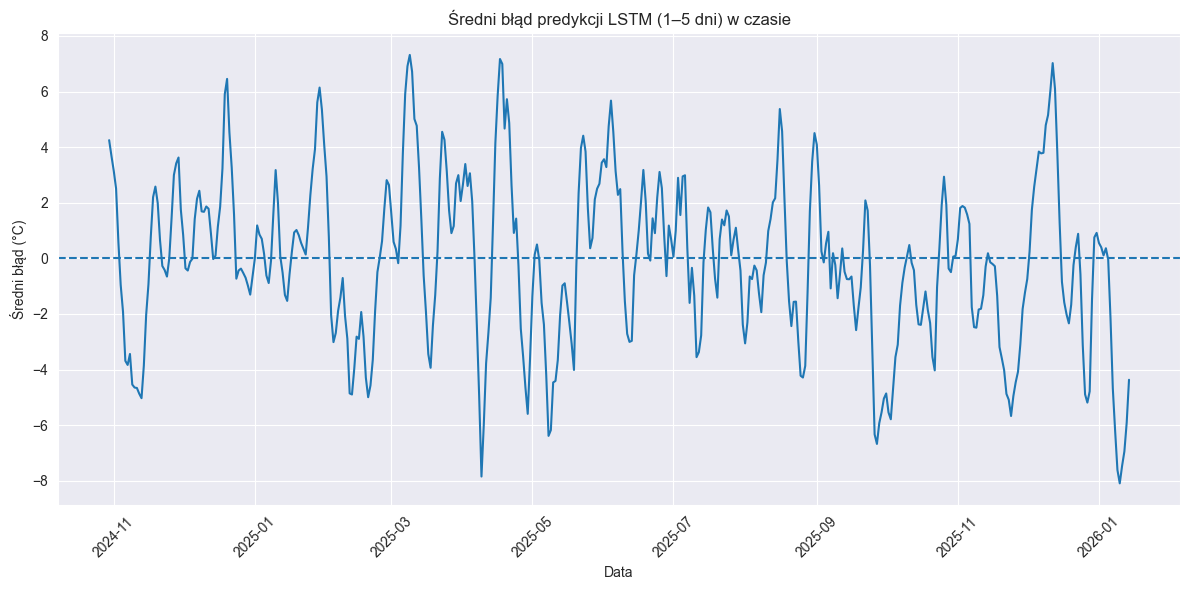

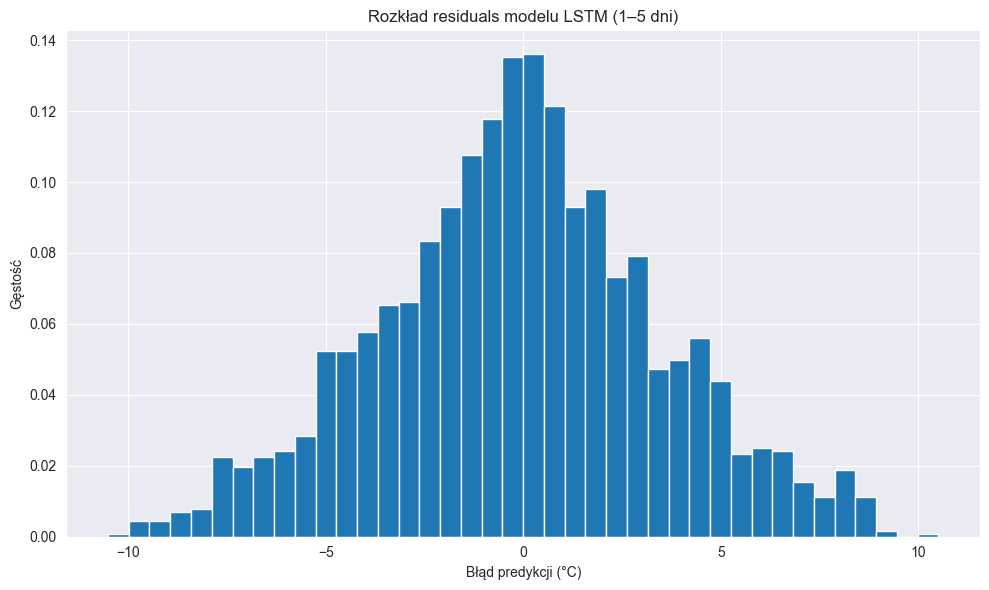

In [72]:
# =========================
# IMPORTY
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# =========================
# PARAMETRY
# =========================
CITY = "Warszawa"
WINDOW = 30
HORIZON = 5

features = [
    'temp',
    'tmin',
    'tmax',
    'wspd',
    'pres',
    'temp_rolling3',
    'temp_diff1'
]

# =========================
# FUNKCJA: sekwencje multi-step
# =========================
def create_sequences_multistep(X, y, window, horizon):
    X_seq, y_seq = [], []
    for i in range(window, len(X) - horizon + 1):
        X_seq.append(X[i-window:i])
        y_seq.append(y[i:i+horizon].flatten())
    return np.array(X_seq), np.array(y_seq)

# =========================
# WCZYTANIE DANYCH
# =========================
df = pd.read_csv(
    "european_capitals_history_clean2.csv",
    parse_dates=["time"]
)

df_city = df[df['city'] == CITY][['time'] + features].copy()
df_city.sort_values('time', inplace=True)
df_city.reset_index(drop=True, inplace=True)


split_ratio = 0.8
split_idx = int(len(df_city) * split_ratio)

train_df = df_city.iloc[:split_idx]
test_df = df_city.iloc[split_idx - WINDOW - HORIZON:]

X_train = train_df[features].values
y_train = train_df[['temp']].values

X_test = test_df[features].values
y_test = test_df[['temp']].values

# =========================
# SKALOWANIE
# =========================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

# =========================
# SEKWENCJE
# =========================
X_test_seq, y_test_seq = create_sequences_multistep(
    X_test_scaled, y_test_scaled, WINDOW, HORIZON
)

# =========================
# MODEL
# =========================
model_path = f"model/lstm/{CITY.lower()}_lstm_multivariate_{HORIZON}dni.keras"
model = load_model(model_path)


y_pred_scaled = model.predict(X_test_seq, verbose=0)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test_seq)


residuals = y_true - y_pred  


mean_residuals = residuals.mean(axis=1)

dates = df_city['time'].iloc[-len(mean_residuals):]

plt.figure(figsize=(12, 6))
plt.plot(dates, mean_residuals)
plt.axhline(0, linestyle='--')
plt.title('Średni błąd predykcji LSTM (1–5 dni) w czasie')
plt.xlabel('Data')
plt.ylabel('Średni błąd (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(residuals.flatten(), bins=40, density=True)
plt.title('Rozkład residuals modelu LSTM (1–5 dni)')
plt.xlabel('Błąd predykcji (°C)')
plt.ylabel('Gęstość')
plt.grid(True)
plt.tight_layout()
plt.show()




In [76]:

import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)


CITY = "Warszawa"
HORIZON = 5
N_SPLITS = 5

regressors = [
    'tmin',
    'tmax',
    'wspd',
    'pres',
    'temp_rolling3',
    'temp_diff1'
]

# =========================
# WCZYTANIE DANYCH
# =========================
df = pd.read_csv(
    "european_capitals_history_clean2.csv",
    parse_dates=["time"]
)

df_city = df[df['city'] == CITY][['time', 'temp'] + regressors].copy()
df_city.sort_values('time', inplace=True)
df_city.reset_index(drop=True, inplace=True)

df_city.rename(columns={'time': 'ds', 'temp': 'y'}, inplace=True)

# =========================
# PARAMETRY CV
# =========================
total_len = len(df_city)
fold_size = (total_len - HORIZON) // N_SPLITS

# =========================
# LISTY NA METRYKI
# =========================
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

print("\n 5-fold TimeSeries Cross-Validation – PROPHET (Warszawa)\n")

# =========================
# CROSS-VALIDATION
# =========================
for fold in range(N_SPLITS):
    print(f"Fold {fold + 1}/5")

    train_end = fold_size * (fold + 1)
    train_df = df_city.iloc[:train_end]
    test_df = df_city.iloc[train_end:train_end + HORIZON]

    if len(test_df) < HORIZON:
        print("  Za mało danych – pominięto fold")
        continue

    # =========================
    # MODEL
    # =========================
    model = Prophet()

    for reg in regressors:
        model.add_regressor(reg)

    model.fit(train_df)

   
    future = test_df[['ds'] + regressors]

    forecast = model.predict(future)

 
    y_true = test_df['y'].values
    y_pred = forecast['yhat'].values

    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    print(
        f"   R²: {r2:.4f} | "
        f"MAE: {mae:.4f} | "
        f"RMSE: {rmse:.4f}"
    )

# =========================
# PODSUMOWANIE
# =========================
print("\n PODSUMOWANIE 5-FOLD CV – PROPHET (WARSZAWA)\n")

print(f"R²   : {np.mean(r2_scores):.4f}")
print(f"MAE  : {np.mean(mae_scores):.4f}")
print(f"MSE  : {np.mean(mse_scores):.4f}")
print(f"RMSE : {np.mean(rmse_scores):.4f}")


20:27:52 - cmdstanpy - INFO - Chain [1] start processing



 5-fold TimeSeries Cross-Validation – PROPHET (Warszawa)

Fold 1/5


20:27:52 - cmdstanpy - INFO - Chain [1] done processing
20:27:52 - cmdstanpy - INFO - Chain [1] start processing


   R²: 0.9895 | MAE: 0.2473 | RMSE: 0.2822
Fold 2/5


20:27:52 - cmdstanpy - INFO - Chain [1] done processing
20:27:52 - cmdstanpy - INFO - Chain [1] start processing


   R²: 0.9591 | MAE: 0.2989 | RMSE: 0.3272
Fold 3/5


20:27:53 - cmdstanpy - INFO - Chain [1] done processing
20:27:53 - cmdstanpy - INFO - Chain [1] start processing


   R²: 0.7935 | MAE: 0.4795 | RMSE: 0.5232
Fold 4/5


20:27:53 - cmdstanpy - INFO - Chain [1] done processing
20:27:53 - cmdstanpy - INFO - Chain [1] start processing


   R²: 0.5528 | MAE: 0.5644 | RMSE: 0.6593
Fold 5/5


20:27:53 - cmdstanpy - INFO - Chain [1] done processing


   R²: 0.8060 | MAE: 0.1550 | RMSE: 0.1989

 PODSUMOWANIE 5-FOLD CV – PROPHET (WARSZAWA)

R²   : 0.8202
MAE  : 0.3490
MSE  : 0.1869
RMSE : 0.3982


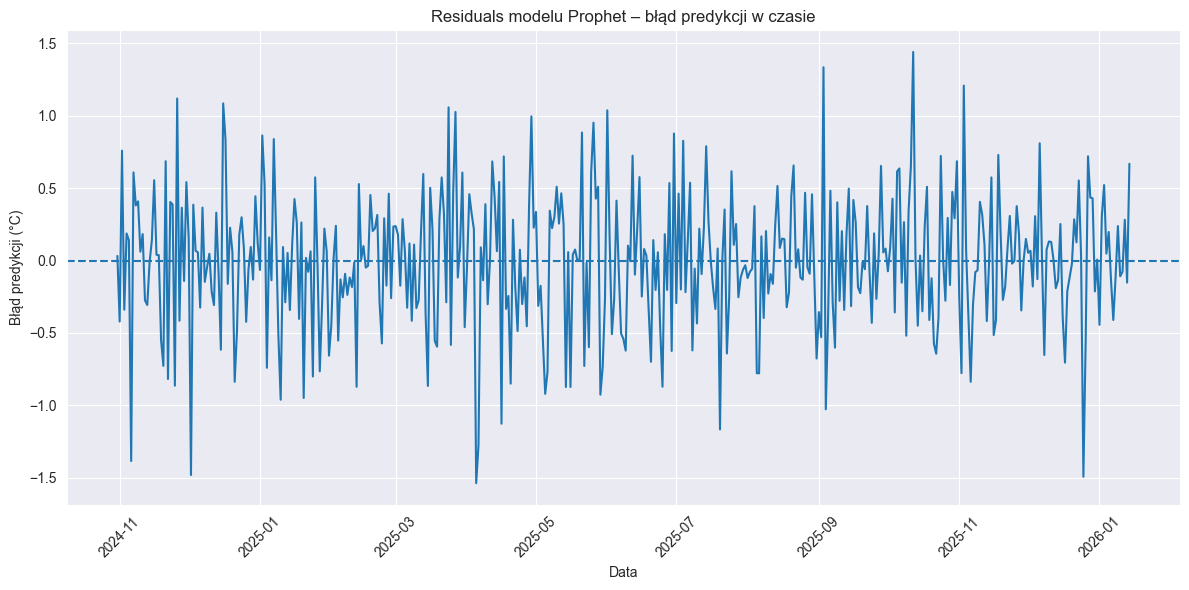

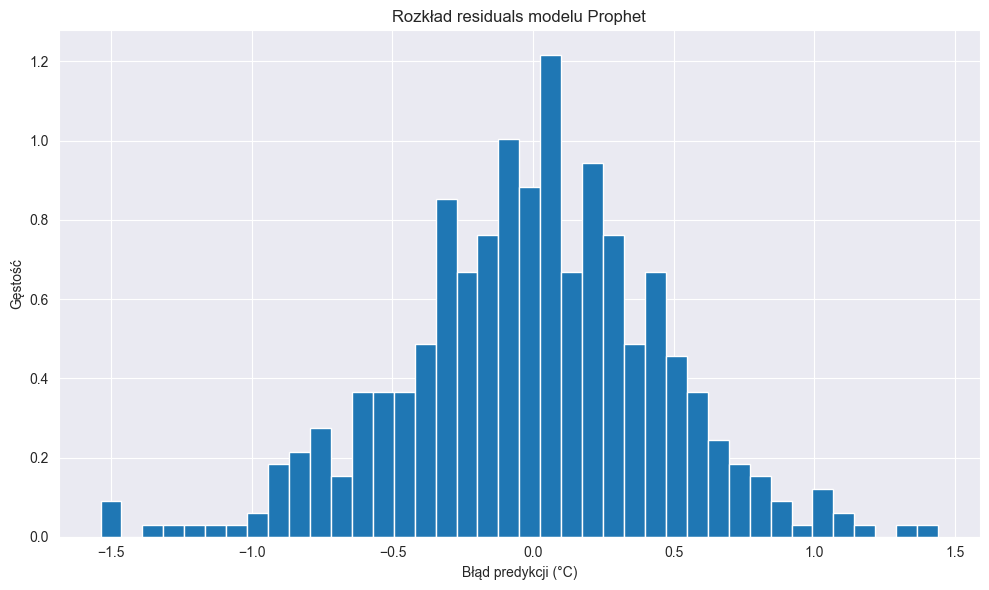

In [77]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet.serialize import model_from_json



CITY = "Warszawa"
HORIZON = 5

regressors = [
    'tmin',
    'tmax',
    'wspd',
    'pres',
    'temp_rolling3',
    'temp_diff1'
]


df = pd.read_csv(
    "european_capitals_history_clean2.csv",
    parse_dates=["time"]
)

df_city = df[df['city'] == CITY][['time', 'temp'] + regressors].copy()
df_city.sort_values('time', inplace=True)
df_city.reset_index(drop=True, inplace=True)

df_city.rename(columns={'time': 'ds', 'temp': 'y'}, inplace=True)


split_ratio = 0.8
split_idx = int(len(df_city) * split_ratio)

train_df = df_city.iloc[:split_idx]
test_df = df_city.iloc[split_idx:]

# =========================
# WCZYTANIE MODELU
# =========================
model_path = f"model/prophet/{CITY.lower()}_prophet.json"

if not os.path.exists(model_path):
    raise FileNotFoundError(" Brak modelu Prophet dla Warszawy")

with open(model_path, "r") as f:
    model = model_from_json(f.read())


future = test_df[['ds'] + regressors].copy()

forecast = model.predict(future)


y_true = test_df['y'].values[:len(forecast)]
y_pred = forecast['yhat'].values[:len(y_true)]

dates = test_df['ds'].iloc[:len(y_true)]


residuals = y_true - y_pred


plt.figure(figsize=(12, 6))
plt.plot(dates, residuals)
plt.axhline(0, linestyle='--')
plt.title('Residuals modelu Prophet – błąd predykcji w czasie')
plt.xlabel('Data')
plt.ylabel('Błąd predykcji (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=40, density=True)
plt.title('Rozkład residuals modelu Prophet')
plt.xlabel('Błąd predykcji (°C)')
plt.ylabel('Gęstość')
plt.grid(True)
plt.tight_layout()
plt.show()

